In [33]:
# data exploration
import json
import pandas as pd
#from textblob import TextBlob

def read_json(json_file: str)->list:
    """
    json file reader to open and read json files into a list
    Args:
    -----
    json_file: str - path of a json file
    
    Returns
    -------
    length of the json file and a list of json
    """
    
    tweets_data = []
    for tweets in open(json_file,'r'):
        tweets_data.append(json.loads(tweets))
    
    
    return len(tweets_data), tweets_data

class TweetDfExtractor:
    """
    this function will parse tweets json into a pandas dataframe
    
    Return
    ------
    dataframe
    """
    def __init__(self, tweets_list):
        
        self.tweets_list = tweets_list

    # an example function
    def find_statuses_count(self)->list:
        statuses_count 
        
    def find_full_text(self)->list:
        text = tweets_data['text']
       
    
    def find_sentiments(self, text)->list:
        
        return polarity, self.subjectivity

    def find_created_time(self)->list:
       
        return created_at

    def find_source(self)->list:
        source = tweets_data['source']

        return source

    def find_screen_name(self)->list:
        screen_name = tweets_data['in_reply_to_screen_name']

    #def find_followers_count(self)->list:
    #    followers_count = 

    #def find_friends_count(self)->list:
    #    friends_count = 

    def is_sensitive(self)->list:
        try:
            is_sensitive = [x['possibly_sensitive'] for x in self.tweets_list]
        except KeyError:
            is_sensitive = None

        return is_sensitive

    def find_favourite_count(self)->list:
        favourite_count = tweets_data['favorite_count']
    
    def find_retweet_count(self)->list:
        retweet_count = tweets_data['retweet_count']

    #def find_hashtags(self)->list:
    #    hashtags = 

    #def find_mentions(self)->list:
    #    mentions = 


    def find_location(self)->list:
        try:
            location = self.tweets_list['user']['location']
        except TypeError:
            location = ''
        
        return location

    
        
        
    def get_tweet_df(self, save=False)->pd.DataFrame:
        """required column to be generated you should be creative and add more features"""
        
        columns = ['created_at', 'source', 'original_text','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
            'original_author', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place']
        
        created_at = self.find_created_time()
        source = self.find_source()
        text = self.find_full_text()
        polarity, subjectivity = self.find_sentiments(text)
        lang = self.find_lang()
        fav_count = self.find_favourite_count()
        retweet_count = self.find_retweet_count()
        screen_name = self.find_screen_name()
        follower_count = self.find_followers_count()
        friends_count = self.find_friends_count()
        sensitivity = self.is_sensitive()
        hashtags = self.find_hashtags()
        mentions = self.find_mentions()
        location = self.find_location()
        data = zip(created_at, source, text, polarity, subjectivity, lang, fav_count, retweet_count, screen_name, follower_count, friends_count, sensitivity, hashtags, mentions, location)
        df = pd.DataFrame(data=data, columns=columns)

        if save:
            df.to_csv('processed_tweet_data.csv', index=False)
            print('File Successfully Saved.!!!')
        
        return df

                
if __name__ == "__main__":
    # required column to be generated you should be creative and add more features
    columns = ['created_at', 'source', 'original_text','clean_text', 'sentiment','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
    'original_author', 'screen_count', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place', 'place_coord_boundaries']
    _, tweet_list = read_json("C:/Users/khali/Downloads/10Academy/Economic_Twitter_Data/Economic_Twitter_Data.json")
    tweet = TweetDfExtractor(tweet_list)
    tweet_df = tweet.get_tweet_df() 

    # use all defined functions to generate a dataframe with the specified columns above


NameError: name 'created_at' is not defined

In [34]:
# data cleaning : 
class Clean_Tweets:
    """
    The PEP8 Standard AMAZING!!!
    """
    def __init__(self, df:pd.DataFrame):
        self.df = df
        print('Automation in Action...!!!')
        
    def drop_unwanted_column(self, df:pd.DataFrame)->pd.DataFrame:
        """
        remove rows that has column names. This error originated from
        the data collection stage.  
        """
        unwanted_rows = df[df['retweet_count'] == 'retweet_count' ].index
        df.drop(unwanted_rows , inplace=True)
        df = df[df['polarity'] != 'polarity']
        
        return df
    def drop_duplicate(self, df:pd.DataFrame)->pd.DataFrame:
        """
        drop duplicate rows
        """
        df = df.drop_duplicates()
        
        return df
    def convert_to_datetime(self, df:pd.DataFrame)->pd.DataFrame:
        """
        convert column to datetime
        """
        df['created_at'] = pd.to_datetime(df['created_at'], format='%Y%m%d')
        
        df = df[df['created_at'] >= '2020-12-31' ]
        
        return df
    
    def convert_to_numbers(self, df:pd.DataFrame)->pd.DataFrame:
        """
        convert columns like polarity, subjectivity, retweet_count
        favorite_count etc to numbers
        """
        df['polarity'] = pd.to_numeric(df['polarity'] , downcast = "float")
        df['subjectivity'] = pd.to_numeric(df['subjectivity'] , downcast = "float")
        df['retweet_count'] = pd.to_numeric(df['retweet_count'] , downcast = "float")
        df['favorite_count'] = pd.to_numeric(df['favorite_count'] , downcast = "float")
        df['retweet_count'] = pd.to_numeric(df['retweet_count'] , downcast = "float")
        df['original_author'] = pd.to_numeric(df['original_author'] , downcast = "float")
        df['followers_count'] = pd.to_numeric(df['followers_count'] , downcast = "float")
        df['friends_count'] = pd.to_numeric(df['friends_count'] , downcast = "float")
        df['possibly_sensitive'] = pd.to_numeric(df['possibly_sensitive'] , downcast = "float")
        df['hashtags'] = pd.to_numeric(df['hashtags'] , downcast = "float")
        df['user_mentions'] = pd.to_numeric(df['user_mentions'] , downcast = "float")
        df['place'] = pd.to_numeric(df['place'] , downcast = "float")
        
        
        return df
    
    def remove_non_english_tweets(self, df:pd.DataFrame)->pd.DataFrame:
        """
        remove non english tweets from lang
        """
        
        df = df[df.lang.map(lambda x: x.isascii())]
        
        return df

In [35]:
df =  pd.read_json("C:/Users/khali/Downloads/10Academy/Economic_Twitter_Data/Economic_Twitter_Data.json" , lines=True)

In [36]:
df.head()

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,2022-04-22 22:20:18+00:00,1517629396575784961,1517629396575784960,RT @nikitheblogger: Irre: Annalena Baerbock sa...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-04-22 22:19:16+00:00,1517629134012399616,1517629134012399616,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-04-22 22:17:28+00:00,1517628682659106822,1517628682659106816,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-04-22 22:17:20+00:00,1517628647892561924,1517628647892561920,RT @WRi007: Die #Deutschen sind ein braves Vol...,False,"{'hashtags': [{'text': 'Deutschen', 'indices':...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-04-22 22:13:15+00:00,1517627621135237127,1517627621135237120,RT @RolandTichy: Baerbock verkündet mal so neb...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,0,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'lang', 'extended_entities',
       'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'withheld_in_countries'],
      dtype='object')

In [38]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    df.head()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 24625 non-null  datetime64[ns, UTC]
 1   id                         24625 non-null  int64              
 2   id_str                     24625 non-null  int64              
 3   text                       24625 non-null  object             
 4   truncated                  24625 non-null  bool               
 5   entities                   24625 non-null  object             
 6   source                     24625 non-null  object             
 7   in_reply_to_status_id      4278 non-null   float64            
 8   in_reply_to_status_id_str  4278 non-null   float64            
 9   in_reply_to_user_id        4567 non-null   float64            
 10  in_reply_to_user_id_str    4567 non-null   float64            
 11  in

In [40]:
x = df.drop(['created_at','text','entities','source','in_reply_to_screen_name','user','geo','coordinates','place','retweeted_status','lang','extended_entities','quoted_status','withheld_in_countries'], axis=1)
y = df['created_at']
x.info()
y.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         24625 non-null  int64  
 1   id_str                     24625 non-null  int64  
 2   truncated                  24625 non-null  bool   
 3   in_reply_to_status_id      4278 non-null   float64
 4   in_reply_to_status_id_str  4278 non-null   float64
 5   in_reply_to_user_id        4567 non-null   float64
 6   in_reply_to_user_id_str    4567 non-null   float64
 7   contributors               0 non-null      float64
 8   is_quote_status            24625 non-null  bool   
 9   retweet_count              24625 non-null  int64  
 10  favorite_count             24625 non-null  int64  
 11  favorited                  24625 non-null  bool   
 12  retweeted                  24625 non-null  bool   
 13  possibly_sensitive         9975 non-null   flo

(24625,)

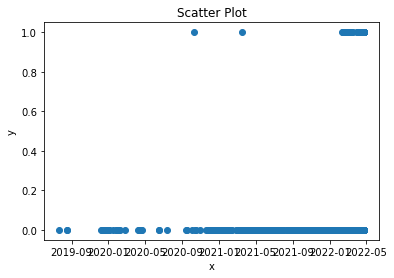

In [41]:
# data exploration and visualization :
import matplotlib.pyplot as plt

# Scatter plot with day against tip
plt.scatter(y , x['possibly_sensitive'])
# Adding Title to the Plot
plt.title("Scatter Plot")
# Setting the X and Y labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()


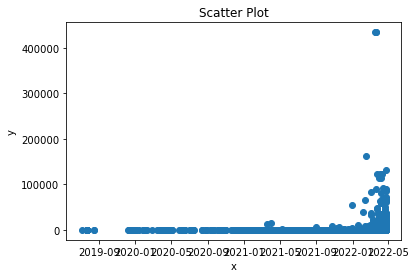

In [42]:
# Scatter plot
plt.scatter(y , x['retweet_count'])
# Adding Title to the Plot
plt.title("Scatter Plot")
# Setting the X and Y labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()

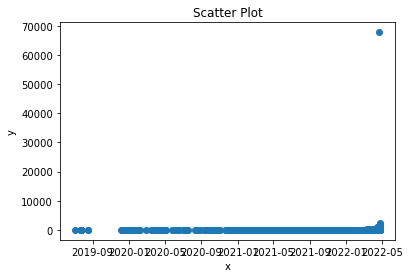

In [43]:
# Scatter plot
plt.scatter(y , x['favorite_count'])
# Adding Title to the Plot
plt.title("Scatter Plot")
# Setting the X and Y labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()

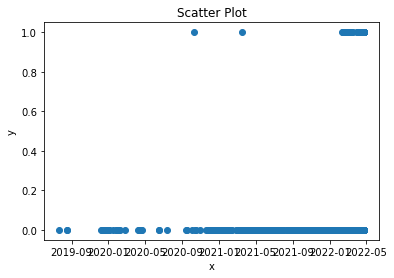

In [44]:
# Scatter plot
plt.scatter(y , x['possibly_sensitive'])
# Adding Title to the Plot
plt.title("Scatter Plot")
# Setting the X and Y labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()

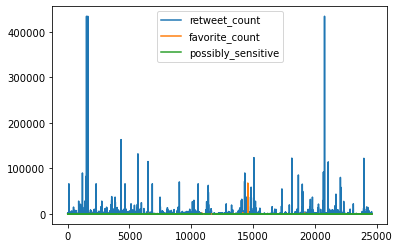

In [45]:
x[['retweet_count', 'favorite_count' , 'possibly_sensitive']].plot()
plt.show()

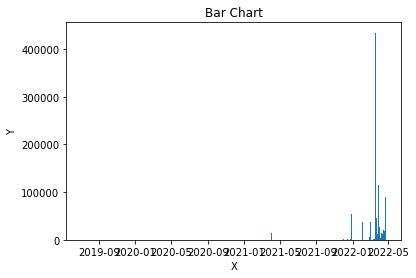

In [46]:
# Bar chart with  against 
plt.bar(y , x['retweet_count'])
  
plt.title("Bar Chart")
  
# Setting the X and Y labels
plt.xlabel('X')
plt.ylabel('Y')
  
# Adding the legends
plt.show()

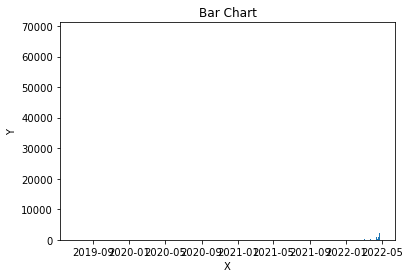

In [47]:
# Bar chart with  against 
plt.bar(y , x['favorite_count'])
  
plt.title("Bar Chart")
  
# Setting the X and Y labels
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

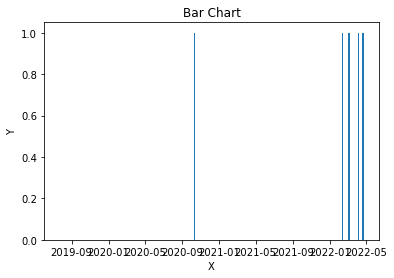

In [48]:
# Bar chart with  against 
plt.bar(y , x['possibly_sensitive'])
  
plt.title("Bar Chart")
  
# Setting the X and Y labels
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

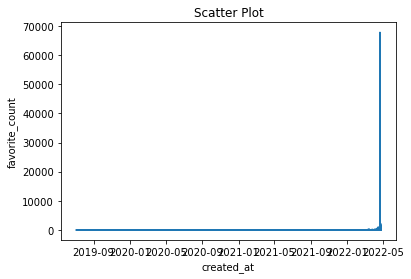

In [49]:
# Scatter plot with day against tip
plt.plot(y , x['favorite_count'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('created_at')
plt.ylabel('favorite_count')
  
plt.show()

In [52]:
pip install nltk  gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24
Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install spacy

  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
    Uninstalling smart-open-6.0.0:
      Successfully uninstalled smart-open-6.0.0
Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'

  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136900 sha256=fd769169a44ed1c95da50e3466f07474bc8680ed39b0a0a1caa4cdb81350f8e6
  Stored in directory: c:\users\khali\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=e2c177708aaa6b3d9400b6ba053dee97bcba24d32706b44f9ab2b6bb682aa552
  Stored in directory: c:\users\khali\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfull

In [67]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [68]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khali\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [69]:
# Convert to list
data = df.text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['RT Irre: Annalena Baerbock sagt, es bricht ihr das Herz, dass man nicht '
 'bedingungslos schwere Waffen liefert. Mir bricht e…']


In [70]:
# tokenize the words from text column and clean the text :
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['rt', 'irre', 'annalena', 'baerbock', 'sagt', 'es', 'bricht', 'ihr', 'das', 'herz', 'dass', 'man', 'nicht', 'bedingungslos', 'schwere', 'waffen', 'liefert', 'mir', 'bricht']]


In [71]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['rt', 'irre', 'annalena', 'baerbock', 'sagt', 'es', 'bricht', 'ihr', 'das', 'herz', 'dass', 'man', 'nicht', 'bedingungslos', 'schwere_waffen', 'liefert', 'mir', 'bricht']


In [72]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [73]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [62]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

NameError: name 'data_lemmatized' is not defined

In [74]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

NameError: name 'corpus' is not defined

In [75]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

NameError: name 'lda_model' is not defined

In [76]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

AttributeError: module 'pyLDAvis' has no attribute 'gensim'

In [77]:
#pip install pandas matplotlib tensorflow

In [78]:
# Sentiment analysis
tweet = df.text.values

In [86]:
sentiment_label = df.possibly_sensitive.factorize()

In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)

In [80]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [81]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [83]:
vocab_size = len(tokenizer.word_index) + 1

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           2667840   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,684,491
Trainable params: 2,684,491
Non-trainable params: 0
____________________________________________

In [87]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
616/616 [==============================] - 97s 153ms/step - loss: -14.4815 - accuracy: 0.3811 - val_loss: -21.2055 - val_accuracy: 0.4335
Epoch 2/5
616/616 [==============================] - 101s 164ms/step - loss: -34.1178 - accuracy: 0.3814 - val_loss: -37.4067 - val_accuracy: 0.4335
Epoch 3/5
616/616 [==============================] - 102s 166ms/step - loss: -52.8781 - accuracy: 0.3814 - val_loss: -53.3912 - val_accuracy: 0.4335
Epoch 4/5
616/616 [==============================] - 100s 162ms/step - loss: -71.4124 - accuracy: 0.3814 - val_loss: -69.2860 - val_accuracy: 0.4335
Epoch 5/5
616/616 [==============================] - 103s 167ms/step - loss: -90.0678 - accuracy: 0.3814 - val_loss: -85.2058 - val_accuracy: 0.4335


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")